# Unveiling the Power of Customer Segmentation

In the dynamic landscape of Business-to-Consumer (B2C) industries, the art of understanding customers goes beyond mere transactions - it's about building relationships. Imagine a bustling mall, each visitor unique in their preferences and behaviours. Just as a skilled host anticipates the needs of their guests, businesses must anticipate and cater to the diverse needs of their customers. This is where customer segmentation steps in. By delving into the world of retail, we'll explore the vital role of customer segmentation in B2C industries.

Let's practice the case study of the mall customers' dataset

Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

- Create customer segmentation using a machine learning algorithm (K-Means Clustering) in Python
- Who are the target customers for focusing on your strategy?

# Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Loading the data

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster', 'Cluster_mapped'],
      dtype='object')

# Checking missing and duplicated value

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Exploration data analysis

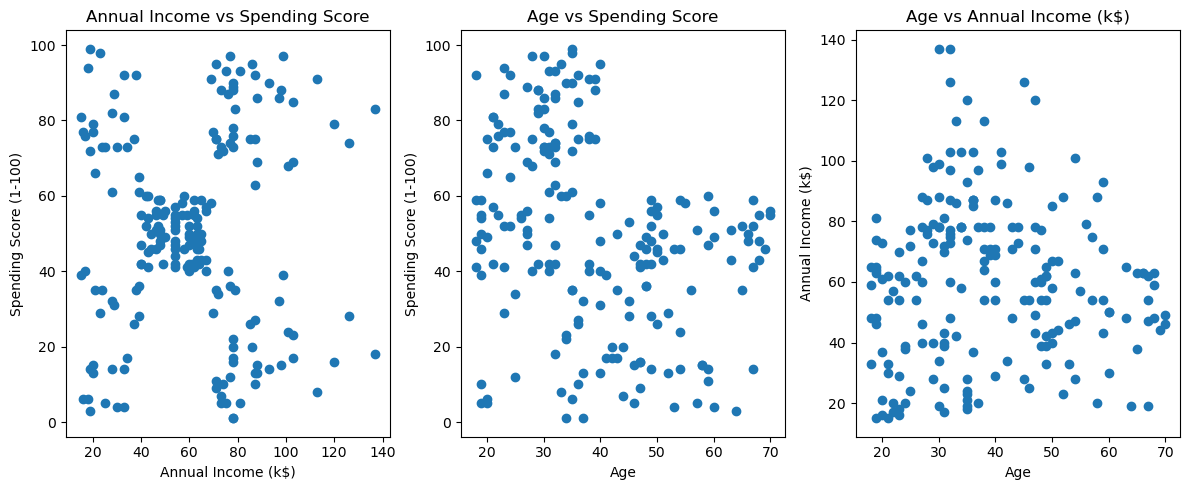

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')

plt.subplot(1, 3, 2)
plt.scatter(data['Age'], data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')

plt.subplot(1, 3, 3)
plt.scatter(data['Age'], data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income (k$)')


plt.tight_layout()
plt.show()


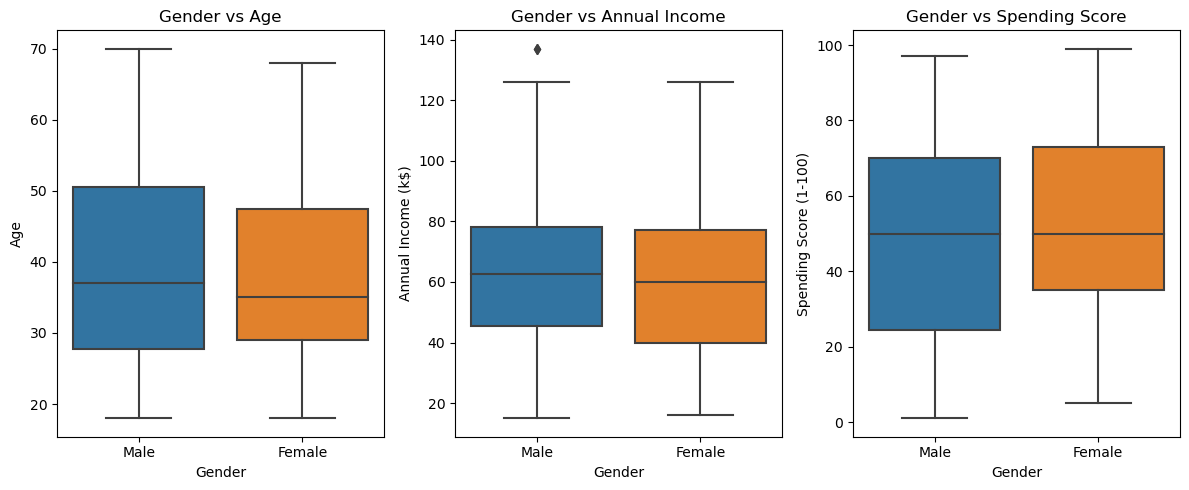

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Age', data=data)
plt.title('Gender vs Age')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title('Gender vs Annual Income')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title('Gender vs Spending Score')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# Select features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Choosing the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\ahmad\anaconda3_new\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmad\anaconda3_new\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmad\anaconda3_new\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmad\anaconda3_new\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL

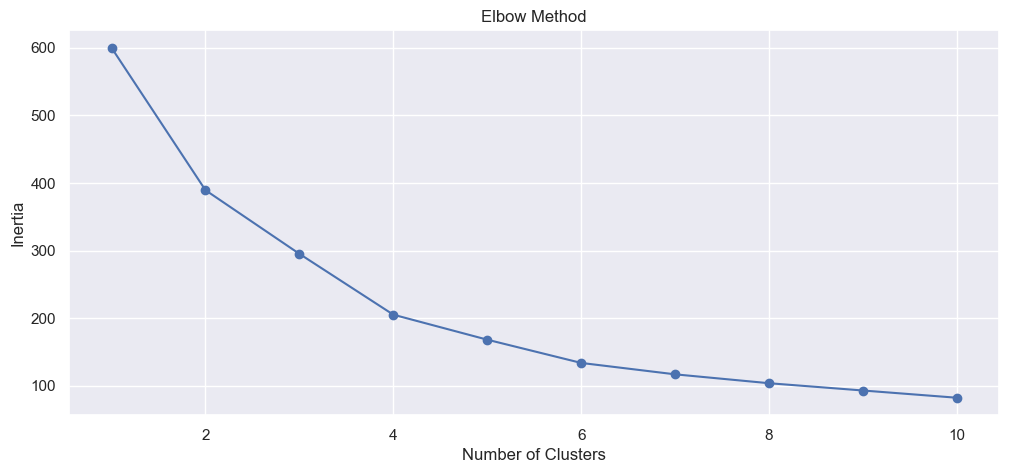

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [14]:
# Fit KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

C:\Users\ahmad\anaconda3_new\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmad\anaconda3_new\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [15]:
# Assign clusters to data
data['Cluster'] = kmeans.labels_

In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [17]:
data.groupby('Cluster')['Annual Income (k$)','Spending Score (1-100)'].describe()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_31128\2767706427.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Cluster')['Annual Income (k$)','Spending Score (1-100)'].describe()


Annual Income (k$)                                                 \
                     count       mean        std   min    25%   50%   75%   
Cluster                                                                     
0                     65.0  47.707692  14.648723  18.0  39.00  49.0  60.0   
1                     40.0  86.100000  16.339036  69.0  74.75  78.5  94.0   
2                     57.0  40.000000  17.031483  15.0  24.00  40.0  57.0   
3                     38.0  86.500000  16.761845  64.0  75.25  79.5  96.0   

               Spending Score (1-100)                                          \
           max                  count       mean        std   min   25%   50%   
Cluster                                                                         
0         79.0                   65.0  39.969231  16.405953   3.0  32.0  46.0   
1        137.0                   40.0  81.525000   9.999968  58.0  74.0  83.0   
2         67.0                   57.0  60.298246  18.434212   6.0  48.0  56.0   
3        137.0                   38.0  19.578947  11.684204   1.0  10.5  17.0   

                      
           75%   max  
Cluster               
0        51.00  60.0  
1        90.00  97.0  
2        73.00  99.0  
3        27.75  42.0


1. **Cluster 0: Balanced Shoppers**
   - Median Annual Income: Around 49
   - Median Spending Score: Around 46
   - Mean Annual Income: Around 47.71
   - Mean Spending Score: Around 39.97

2. **Cluster 1: High Spenders**
   - Median Annual Income: Around 78.5
   - Median Spending Score: Around 83
   - Mean Annual Income: Around 86.10
   - Mean Spending Score: Around 81.53

3. **Cluster 2: Budget Shoppers**
   - Median Annual Income: Around 40
   - Median Spending Score: Around 56
   - Mean Annual Income: Around 40.00
   - Mean Spending Score: Around 60.30

4. **Cluster 3: Spontaneous Spenders**
   - Median Annual Income: Around 79.5
   - Median Spending Score: Around 17
   - Mean Annual Income: Around 86.50
   - Mean Spending Score: Around 19.58


In [18]:
# label encoder
mapping_cluster = {
    0: 'Balanced Shoppers',
    1: 'High Spenders',
    2: 'Budget Shoppers',
    3: 'Spontaneous Spenders'
}
data['Cluster_mapped'] = data['Cluster'].map(mapping_cluster)

In [19]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_mapped
0,1,Male,19,15,39,2,Budget Shoppers
1,2,Male,21,15,81,2,Budget Shoppers
2,3,Female,20,16,6,2,Budget Shoppers
3,4,Female,23,16,77,2,Budget Shoppers
4,5,Female,31,17,40,2,Budget Shoppers


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Budget Shoppers'),
  Text(1, 0, 'Balanced Shoppers'),
  Text(2, 0, 'Spontaneous Spenders'),
  Text(3, 0, 'High Spenders')])

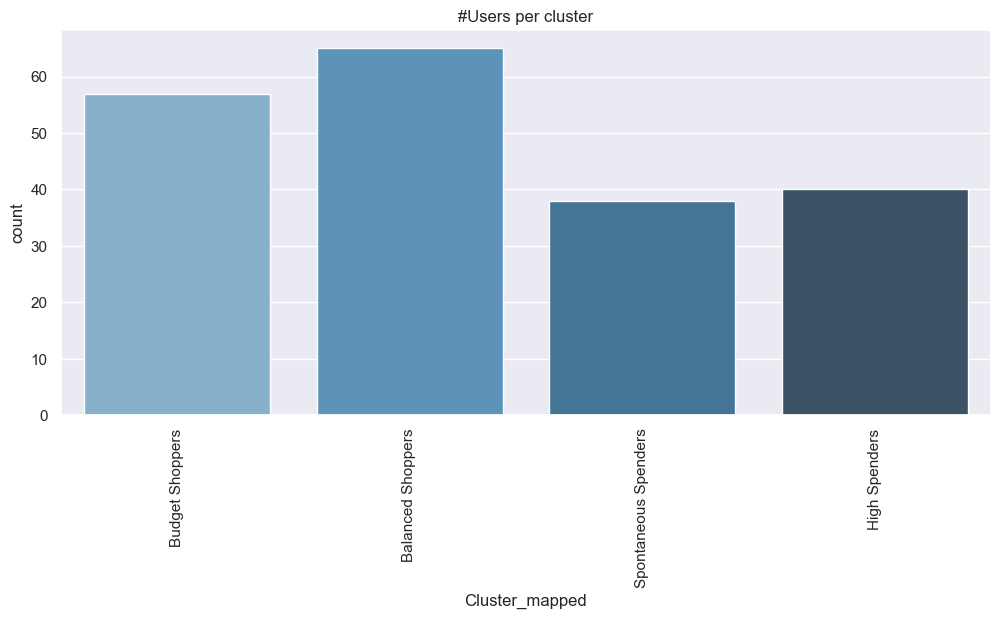

In [20]:
plt.figure(figsize=(12, 5))
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=data['Cluster_mapped'], palette='Blues_d')
plt.title('#Users per cluster')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

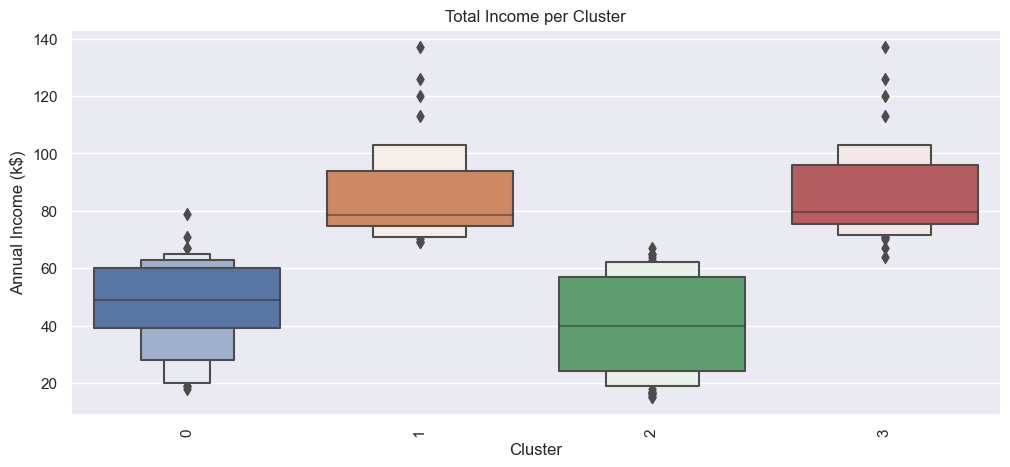

In [21]:
plt.figure(figsize=(12, 5))
sns.boxenplot(x=data['Cluster'], y=data['Annual Income (k$)'])
plt.title('Total Income per Cluster')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

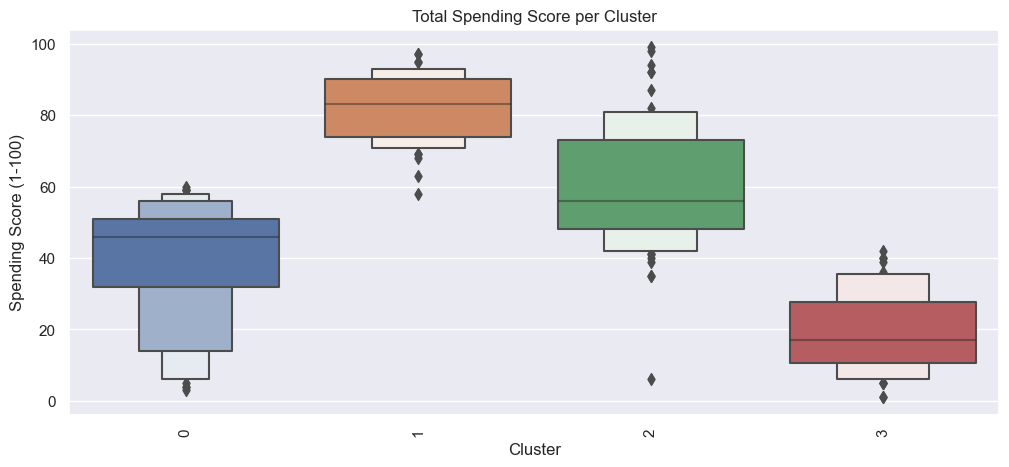

In [26]:
plt.figure(figsize=(12, 5))
sns.boxenplot(x=data['Cluster'], y=data['Spending Score (1-100)'])
plt.title('Total Spending Score per Cluster')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

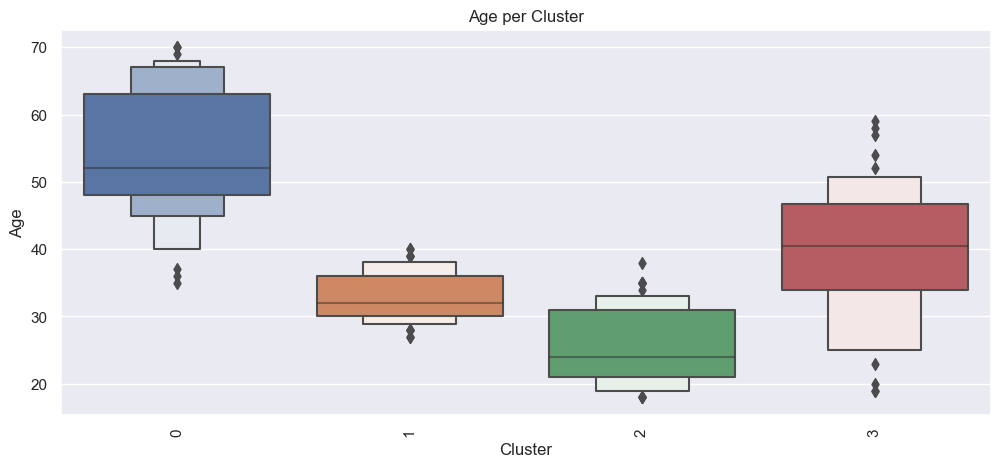

In [23]:
plt.figure(figsize=(12, 5))
sns.boxenplot(x=data['Cluster'], y=data['Age'])
plt.title('Age per Cluster')
plt.xticks(rotation=90)

# Interpretation and recommendation:

- Cluster 0 (Balanced Shoppers) is dominated by elderly people aged 45 to 68. These people are those who have already started families. They have relatively low annual incomes ranging from $40,000 to $60,000 and are the type of people who are frugal with their spending. Their average spending score is moderate. This cluster has median values for annual income and spending that are balanced. Customers in this cluster have an average income and spending habits. The means are also comparable, underscoring the group's balanced nature. This cluster has a large number of subscribers, totalling 65 people.
- Cluster 1 (High Spenders) is dominated by adults aged 30–35 years. Customers in this cluster had higher median and mean yearly income and spending scores. Even though their income fluctuates, they constantly exhibit high spending tendencies. This group is classified as heavy spenders. This cluster contains 40 consumers in total.
- Cluster 2 (Budget Shoppers) is dominated by clients between the ages of 18 and 32. This cluster's median yearly income is lower, indicating that its customers are frugal. The mean spending score is greater, indicating that some customers are ready to pay more, while the median spending score is lower. This variant indicates a variety of shopping behaviours that correspond to the description of budget shoppers. In this cluster, there are 57 clients in total.
- And customers in Cluster 3 (Spontaneous Spenders) range in age from 25 to 50 years old. Customers in this cluster have a greater median yearly income, but a lower median expenditure score. Despite the lower median spending score, the mean spending score is greater, showing the presence of impulsive spenders who make high spending decisions on occasion. In this cluster, there are 38 clients in total.

In order for this consumer to continue spending on things, the company must provide high-quality service to cluster 1 or High Spender. Shoppers must be thoroughly examined in order to enhance their transactions via personal advice and keep their transactions going indefinitely. Cluster 0 or balanced consumer and cluster 3 or spontaneous spender must be thoroughly examined in order to boost conversion of their spending through cluster promotion/discount or matching item price.